## CS345 Fall 2023 Assignment 3


### Datasets

* The [QSAR](http://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation) data for predicting the biochemical activity of a molecule.
* The [Wisconsin breast cancer wisconsin dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).
  

## Part 1:  choosing optimal hyperparameters

Just about any machine learning algorithm has some **hyperparameters**.  These are parameters that are set by the user and are not determined as part of the training process.
The perceptron for example, has two of those - the number of epochs and the learning rate.  For the k-nearest neighbor classifier (kNN) it's the number of neighbors, $k$, and for the linear SVM it's the soft margin constant, $C$.  Our objective in machine learning is to obtain classifiers with high accuracy, and have good estimates of how well they are performing.  In other words, we need to know how accurate a classifier would be on unseen data.  This is why we use separate test sets that the classifier has not seen for evaluating accuracy.

When working with classifiers with hyperparameters you may be tempted to apply the following procedure:

* Randomly split the data into separate train and test sets.
* Loop over a list of candidate values for the hyperparameter.
* For each value, train the classifier over the training set and evaluate its performance on the test set.
* Choose the parameter value that maximizes the accuracy over the test set, and report the accuracy that you obtained.

However, it turns out that this procedure is flawed, and the resulting accuracy estimate can be overly optimistic.  This is because the choice of the best performing parameter value used information about the test set: by selecting the best value according to performance on the test set, we use information about the labels of the test set.  Therefore, the predicted labels are based on information regarding the labels of the test set, making it so this is no longer an independent test set.

Here is a better approach.  Rather than splitting the data into train and test sets, we will now split the data into three sets:  **training, validation, and test**.  The validation set will be used for evaluation of different values of the hyperparameter, leading to the following approach:

* Randomly split the data into separate train, validation, and test sets (say with ratios of 0.5, 0.2, 0.3).
* Loop over a list of candidate values for the hyperparameter.
* For each value, train the classifier over the **training set** and evaluate its performance on the **validation set**. 
* Choose the best classifier, and report its accuracy over the **test set**.

Your task is as follows:

* Use the method described above to evaluate the performance of the kNN classifier over the QSAR and Wisconsin breast cancer dataset.  Use a wide range of $k$ values.  Repeat the process ten times over different train/test splits and report the average accuracy over the test set.  What value of $k$ was chosen most often?  Note that the optimal value of $k$ may vary for different splits.  Comment on your results.

* Perform the same experiment for the linear SVM. In this case the soft-margin constant $C$ is the hyperparameter that requires an informed choice.  Use a wide range of values for $C$, as we have done in class.  Comment on your results.

In your code, use the scikit-learn kNN and SVM implementations; you can also use the scikit-learn `train_test_split`.  When using scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class, make sure to provide the parameter `kernel="linear"` so that the the resulting SVM is indeed linear; alternatively, use the [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) class.

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load datasets
qsar_data = pd.read_csv('biodeg.csv', sep=';')
cancer_data = load_breast_cancer()

# Define hyperparameter values
k_values = [1, 3, 5, 10, 15, 20, 25, 30]
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Define variables to track best k and C values
knn_best_k_qsar = None
svm_best_C_qsar = None
knn_best_k_cancer = None
svm_best_C_cancer = None

# Define variables to track best accuracy for kNN and SVM
knn_best_accuracy_qsar = 0
svm_best_accuracy_qsar = 0
knn_best_accuracy_cancer = 0
svm_best_accuracy_cancer = 0

# Perform experiments for the QSAR dataset
for _ in range(10):
    train_data, test_data, train_labels, test_labels = train_test_split(qsar_data.iloc[:, :-1], qsar_data.iloc[:, -1], test_size=0.3)
    validation_data, test_data, validation_labels, test_labels = train_test_split(test_data, test_labels, test_size=0.5)

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_data, train_labels)
        accuracy = accuracy_score(validation_labels, knn.predict(validation_data))
        if accuracy > knn_best_accuracy_qsar:
            knn_best_accuracy_qsar = accuracy
            knn_best_k_qsar = k

    for C in C_values:
        svm = SVC(kernel='linear', C=C)
        svm.fit(train_data, train_labels)
        accuracy = accuracy_score(validation_labels, svm.predict(validation_data))
        if accuracy > svm_best_accuracy_qsar:
            svm_best_accuracy_qsar = accuracy
            svm_best_C_qsar = C

print("QSAR Dataset - kNN Best k:", knn_best_k_qsar)
print("QSAR Dataset - SVM Best C:", svm_best_C_qsar)

best_knn_qsar = KNeighborsClassifier(n_neighbors=knn_best_k_qsar)
best_knn_qsar.fit(train_data, train_labels)

best_svm_qsar = SVC(kernel='linear', C=svm_best_C_qsar)
best_svm_qsar.fit(train_data, train_labels)

knn_test_accuracy_qsar = accuracy_score(test_labels, best_knn_qsar.predict(test_data))
svm_test_accuracy_qsar = accuracy_score(test_labels, best_svm_qsar.predict(test_data))

print("QSAR Dataset - kNN Test Accuracy:", knn_test_accuracy_qsar)
print("QSAR Dataset - SVM Test Accuracy:", svm_test_accuracy_qsar)

# Perform experiments for the Breast Cancer dataset
for _ in range(10):
    train_data, test_data, train_labels, test_labels = train_test_split(cancer_data.data, cancer_data.target, test_size=0.3)
    validation_data, test_data, validation_labels, test_labels = train_test_split(test_data, test_labels, test_size=0.5)

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_data, train_labels)
        accuracy = accuracy_score(validation_labels, knn.predict(validation_data))
        if accuracy > knn_best_accuracy_cancer:
            knn_best_accuracy_cancer = accuracy
            knn_best_k_cancer = k

    for C in C_values:
        svm = SVC(kernel='linear', C=C)
        svm.fit(train_data, train_labels)
        accuracy = accuracy_score(validation_labels, svm.predict(validation_data))
        if accuracy > svm_best_accuracy_cancer:
            svm_best_accuracy_cancer = accuracy
            svm_best_C_cancer = C

print("Breast Cancer Dataset - kNN Best k:", knn_best_k_cancer)
print("Breast Cancer Dataset - SVM Best C:", svm_best_C_cancer)

best_knn_cancer = KNeighborsClassifier(n_neighbors=knn_best_k_cancer)
best_knn_cancer.fit(train_data, train_labels)

best_svm_cancer = SVC(kernel='linear', C=svm_best_C_cancer)
best_svm_cancer.fit(train_data, train_labels)

knn_test_accuracy_cancer = accuracy_score(test_labels, best_knn_cancer.predict(test_data))
svm_test_accuracy_cancer = accuracy_score(test_labels, best_svm_cancer.predict(test_data))

print("Breast Cancer Dataset - kNN Test Accuracy:", knn_test_accuracy_cancer)
print("Breast Cancer Dataset - SVM Test Accuracy:", svm_test_accuracy_cancer)

QSAR Dataset - kNN Best k: 3
QSAR Dataset - SVM Best C: 10
QSAR Dataset - kNN Test Accuracy: 0.779874213836478
QSAR Dataset - SVM Test Accuracy: 0.8616352201257862
Breast Cancer Dataset - kNN Best k: 3
Breast Cancer Dataset - SVM Best C: 1
Breast Cancer Dataset - kNN Test Accuracy: 0.9069767441860465
Breast Cancer Dataset - SVM Test Accuracy: 0.9186046511627907


**and space for discussing your results**

Here are the results of my 3 tests:

Test 1:

QSAR Dataset - kNN Best k: 5

QSAR Dataset - SVM Best C: 10

QSAR Dataset - kNN Test Accuracy: 0.7861635220125787

QSAR Dataset - SVM Test Accuracy: 0.8364779874213837

Breast Cancer Dataset - kNN Best k: 3

Breast Cancer Dataset - SVM Best C: 100

Breast Cancer Dataset - kNN Test Accuracy: 0.9418604651162791

Breast Cancer Dataset - SVM Test Accuracy: 0.9651162790697675

Test 2:

QSAR Dataset - kNN Best k: 3

QSAR Dataset - SVM Best C: 100

QSAR Dataset - kNN Test Accuracy: 0.8301886792452831

QSAR Dataset - SVM Test Accuracy: 0.8679245283018868

Breast Cancer Dataset - kNN Best k: 5

Breast Cancer Dataset - SVM Best C: 1

Breast Cancer Dataset - kNN Test Accuracy: 0.8604651162790697

Breast Cancer Dataset - SVM Test Accuracy: 0.9302325581395349

Test 3:

QSAR Dataset - kNN Best k: 3

QSAR Dataset - SVM Best C: 10

QSAR Dataset - kNN Test Accuracy: 0.779874213836478

QSAR Dataset - SVM Test Accuracy: 0.8616352201257862

Breast Cancer Dataset - kNN Best k: 3

Breast Cancer Dataset - SVM Best C: 1

Breast Cancer Dataset - kNN Test Accuracy: 0.9069767441860465

Breast Cancer Dataset - SVM Test Accuracy: 0.9186046511627907


As expected the optimal hyperparameters varried between tests since it seems to depend on the specific data split. The test accuracy told a different story however. It was clear from my testing that the test accuracy for kNN was less accurate then the test accuracy for linear SVM over both datasets. This was only by a margin of about 6 percent for the qsar dataset and about 2 percent for the breast cancer dataset, so each method performed relatively well. Additionally, between the two datasets, the breast cancer dataset had better accuracy overall. In summary, the choice of hyperparameters can significantly impact the classification performance. 

## Part 2:  PCA for removing noise from data

As we have seen in class, performance of the nearest neighbor classifer degrades when the data has noisy features that are not relevant to the classification problem.  To remedy this problem, we will use PCA to reduce the dimensionality of the data.

Here is what you need to do:

* **Classifier performance with and without noise**.  Use the QSAR dataset and evaluate performance of K nearest neighbors and SVM.  For simplicity, choose the values of K and $C$ that you selected in part 1.  Also, we need to know whether the data should be standardized or not, so compare performance for standardized / non-standardized data.  Next, add 2000 noise features and evaluate model performance after doing so (use the better performing dataset between standardized / non-standardized dataset as your starting point).
* **Can PCA improve performance on noisy data?**  Next, we will see if PCA can improve the performance of the classifier on the data we added noise to.  Use PCA to represent the noise-added data in the space of the principal components.  Make sure the data is centered or standardized before applying PCA (Recall that centering refers to subtracting the mean from each feature, making it so that each feature has a mean of 0).  Evaluate the performance of the KNN and SVM classifiers as you vary the number of principal components (no need to go above the original dimensionality of the dataset when doing so).  Plot the accuracy of each classifier on the test set as you vary the number of components.
* **Discussion**.  Discuss your results:  was PCA useful for improving classifier performance?  Which of the two classifiers appears to be more robust to noise?  Why do you think that is the case?


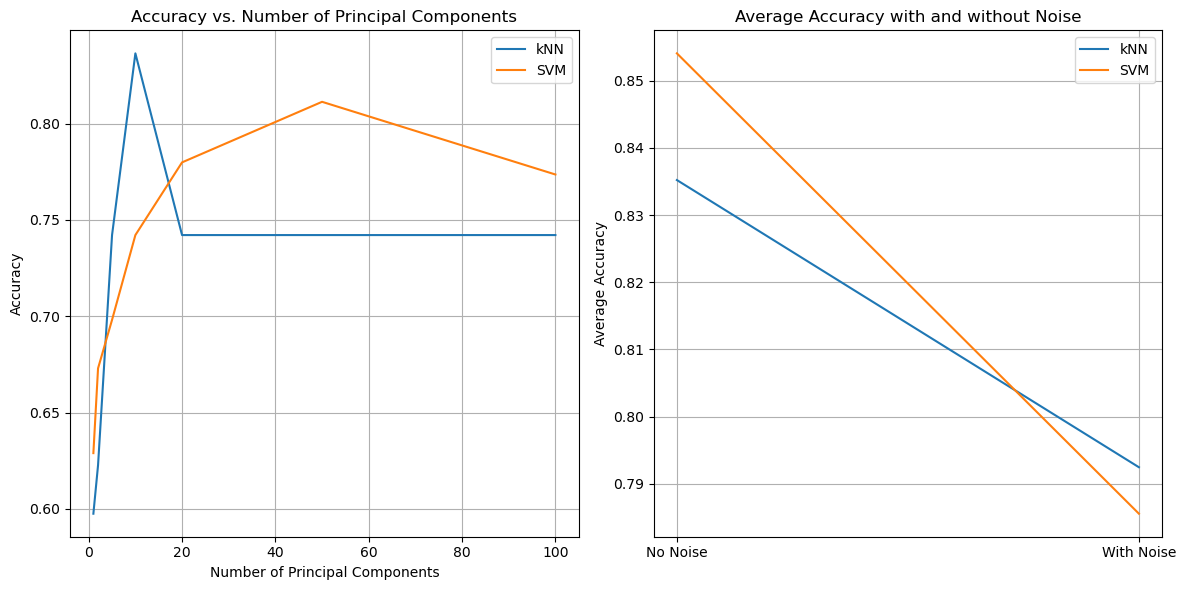

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

knn_best_accuracy = 0
svm_best_accuracy = 0

knn_accuracy_no_noise = []
svm_accuracy_no_noise = []
knn_accuracy_with_noise = []
svm_accuracy_with_noise = []

for _ in range(10):
    train_data, test_data, train_labels, test_labels = train_test_split(qsar_data.iloc[:, :-1], qsar_data.iloc[:, -1], test_size=0.3)
    validation_data, test_data, validation_labels, test_labels = train_test_split(test_data, test_labels, test_size=0.5)

    scaler = StandardScaler()
    train_data_std = scaler.fit_transform(train_data)
    validation_data_std = scaler.transform(validation_data)
    test_data_std = scaler.transform(test_data)

    train_data_std_noisy = np.hstack((train_data_std, np.random.rand(len(train_data_std), 2000)))
    validation_data_std_noisy = np.hstack((validation_data_std, np.random.rand(len(validation_data_std), 2000)))
    test_data_std_noisy = np.hstack((test_data_std, np.random.rand(len(test_data_std), 2000)))

    for k in k_values:
        knn_std = KNeighborsClassifier(n_neighbors=k)
        svm_std = SVC(kernel='linear', C=svm_best_C_qsar)

        knn_std.fit(train_data_std_noisy, train_labels)
        svm_std.fit(train_data_std_noisy, train_labels)

        knn_std_accuracy = accuracy_score(validation_labels, knn_std.predict(validation_data_std_noisy))
        svm_std_accuracy = accuracy_score(validation_labels, svm_std.predict(validation_data_std_noisy))

        if knn_std_accuracy > knn_best_accuracy:
            knn_best_accuracy = knn_std_accuracy
        if svm_std_accuracy > svm_best_accuracy:
            svm_best_accuracy = svm_std_accuracy
    
    knn_no_noise = KNeighborsClassifier(n_neighbors=knn_best_k_qsar)
    svm_no_noise = SVC(kernel='linear', C=svm_best_C_qsar)

    knn_no_noise.fit(train_data_std, train_labels)
    svm_no_noise.fit(train_data_std, train_labels)

    knn_accuracy_no_noise.append(accuracy_score(test_labels, knn_no_noise.predict(test_data_std)))
    svm_accuracy_no_noise.append(accuracy_score(test_labels, svm_no_noise.predict(test_data_std)))

    knn_with_noise = KNeighborsClassifier(n_neighbors=knn_best_k_qsar)
    svm_with_noise = SVC(kernel='linear', C=svm_best_C_qsar)

    knn_with_noise.fit(train_data_std_noisy, train_labels)
    svm_with_noise.fit(train_data_std_noisy, train_labels)

    knn_accuracy_with_noise.append(accuracy_score(test_labels, knn_with_noise.predict(test_data_std_noisy)))
    svm_accuracy_with_noise.append(accuracy_score(test_labels, svm_with_noise.predict(test_data_std_noisy)))

components_to_test = [1, 2, 5, 10, 20, 50, 100]

knn_accuracies = []
svm_accuracies = []

for n_components in components_to_test:
    pca = PCA(n_components=n_components)
    noisy_data_std_noisy_pca = pca.fit_transform(validation_data_std_noisy)
    noisy_test_data_std_noisy_pca = pca.transform(test_data_std_noisy)

    knn_pca = KNeighborsClassifier(n_neighbors=knn_best_k_qsar)
    svm_pca = SVC(kernel='linear', C=svm_best_C_qsar)

    knn_pca.fit(noisy_data_std_noisy_pca, validation_labels)
    svm_pca.fit(noisy_data_std_noisy_pca, validation_labels)

    knn_pca_accuracy = accuracy_score(test_labels, knn_pca.predict(noisy_test_data_std_noisy_pca))
    svm_pca_accuracy = accuracy_score(test_labels, svm_pca.predict(noisy_test_data_std_noisy_pca))

    knn_accuracies.append(knn_pca_accuracy)
    svm_accuracies.append(svm_pca_accuracy)
    

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(components_to_test, knn_accuracies, label='kNN')
plt.plot(components_to_test, svm_accuracies, label='SVM')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(['No Noise', 'With Noise'], [np.mean(knn_accuracy_no_noise), np.mean(knn_accuracy_with_noise)], label='kNN')
plt.plot(['No Noise', 'With Noise'], [np.mean(svm_accuracy_no_noise), np.mean(svm_accuracy_with_noise)], label='SVM')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy with and without Noise')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Discussion of your results**
For my code I standarize my data and split it into training, test, and validation sets and add noise to the data. I then calculate and store the accuracy for the standardized kNN and SVM data sets with and without noise. Next, I loop over the PCA components I want to test and evaluate kNN and SCM with PCA. Lastly, I create two subplots, the first to show the accuracy of kNN and SVM as the number of principal components varies and the second to show the average accuracy of kNN and SVM with and without noise.

From the two graphs I created I can make some conclusions on whether PCA was useful for improving classifier performance. According to the first graph, I observed that both kNN and SVM experienced accuracy fluctuation however kNN appeared to be more sensitive to PCA. From my second graph I can conlcude that both kNN and SVM decrease in perforamance as noise is introduced however SVM was more accurate all around. I believe this is because of the differences in the way kNN and SVM function.

### Code organization

Both tasks in this assignment require you to run a particular experiment over multiple classifiers, datasets, or pre-processing steps.  In writing your code refrain from repeating the code over and over again.  To achieve that, decompose the task such that your code is modular and concise.  Not only will your code be more readable and elegant, this will also enable you to be more productive.

### Your Report

Answer the questions in the cells reserved for that purpose.

### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots in your notebook.

### Grading 

```
Grading sheet for assignment 3

Part 1:  5 points
Model selection code for SVM/KNN (4 pts)
Discussion of your results (0.5 pt)
Code organization (0.5 pt)
Part 2:  5 points
Baseline SVM/KNN performance (1 pt)
SVM/KNN performance as a function of number of PCs (2.5 pts)
Discussion of your results (1 pt)
Code organization (0.5 pt)
```

Grading should be based on the following criteria:

  * Code correctness.
  * Plots and other results are well formatted and easy to understand.
  * Interesting and meaningful observations made where requested.
  * Notebook is readable, well-organized, and concise.
  
